In [2]:
import pandas as pd

In [9]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/phani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/phani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/phani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/phani/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
data = pd.read_csv("../raw_data/factcheck.csv")

In [24]:
df = data

In [6]:
df.head()

,Unnamed: 0,Title,Author,Label,Abstract,Main Body,Word Count,Picture Count,Subject,Most Recurrent Word,Topic
0,0,Threads Post Distorts Trump’s Remarks on Iron ...,Alan Jaffe,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,644,16,threads-post-distorts-trumps-remarks-on-iron-d...,dome,Donald Trump
1,1,Trump’s Bogus Attack on FBI Crime Statistics,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,1867,18,trumps-bogus-attack-on-fbi-crime-statistics,crime,Donald Trump
2,2,Trump’s Partisan Spin on TikTok,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,920,17,trumps-partisan-spin-on-tiktok,tiktok,Donald Trump
3,3,FactChecking Biden’s Swing-State Stops in Penn...,D'Angelo Gore,0,traducido porel tiempo latinowhile former pres...,Traducido porEl Tiempo Latino.While former Pre...,1542,18,factchecking-bidens-swing-state-stops-in-penns...,trump,Donald Trump
4,4,Trump’s Unfounded ‘Colossal’ Tax Hike Warning,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,873,18,trumps-unfounded-colossal-tax-hike-warning,tax,Donald Trump


In [7]:
len(df)

3062

In [8]:
df['Main Body'][0]

"Este artículo estará disponible en españolen El Tiempo Latino.Quick TakeAt a campaign rally in Michigan, former President Donald Trump promised to build an Iron Dome missile defense system for the U.S. that would serve as “a shield around our country.” A post on Threads falsely claimed Trump said the system would be used to “‘defend us’ from Canada.”Full StoryOn a day off from hiscriminal trialin New York City, former President Donald Trump traveled to the swing states of Wisconsin and Michigan on May 1 forcampaign ralliesin support of his effort to regain the White House.A postshared on Threads on May 1shows a clip from Trump’s rally that day in Freeland, Michigan, and the Thread user claims, “Donald Trump wants to build an ‘iron dome’ at the border of our country to ‘defend us’ from Canada. Yes, Canada.”In the22-second videoin the Threads post, Trump says, “In my next term, we will build a great Iron Dome very much like Israel has, but even better. I’m saying, why don’t we have that

In [11]:
df[df.duplicated()]

,Unnamed: 0,Title,Author,Label,Abstract,Main Body,Word Count,Picture Count,Subject,Most Recurrent Word,Topic


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3062 non-null   int64 
 1   Title                3062 non-null   object
 2   Author               3062 non-null   object
 3   Label                3062 non-null   int64 
 4   Abstract             3061 non-null   object
 5   Main Body            3061 non-null   object
 6   Word Count           3062 non-null   int64 
 7   Picture Count        3062 non-null   int64 
 8   Subject              3062 non-null   object
 9   Most Recurrent Word  3062 non-null   object
 10  Topic                3062 non-null   object
dtypes: int64(4), object(7)
memory usage: 263.3+ KB


In [26]:
df.isna().sum()

Unnamed: 0             0
Title                  0
Author                 0
Label                  0
Abstract               1
Main Body              1
Word Count             0
Picture Count          0
Subject                0
Most Recurrent Word    0
Topic                  0
dtype: int64

In [19]:
df.loc[df['Main Body'].isna()]

,Unnamed: 0,Title,Author,Label,Abstract,Main Body,Word Count,Picture Count,Subject,Most Recurrent Word,Topic
2589,2589,"Wind Energy, Stock Market, VA",FactCheck.org,0,NaN,NaN,0,16,wind-energy-stock-market-va,None,FactCheck Quiz


In [27]:
df = df.loc[df['Unnamed: 0']!=2589]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3061 non-null   int64 
 1   Title                3061 non-null   object
 2   Author               3061 non-null   object
 3   Label                3061 non-null   int64 
 4   Abstract             3061 non-null   object
 5   Main Body            3061 non-null   object
 6   Word Count           3061 non-null   int64 
 7   Picture Count        3061 non-null   int64 
 8   Subject              3061 non-null   object
 9   Most Recurrent Word  3061 non-null   object
 10  Topic                3061 non-null   object
dtypes: int64(4), object(7)
memory usage: 287.0+ KB


In [33]:
import string
import re
from unidecode import unidecode
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('portuguese'))

def preprocessing(sentence):
    sentence = sentence.lower().strip()
    sentence = unidecode(sentence)
    
    sentence = "".join(char for char in sentence if not char.isdigit())
    
    for punc in string.punctuation:
        sentence = sentence.replace(punc, "")
    
    sentence =sentence.strip()
    word_tokens = word_tokenize(sentence)
    
    stop_words = set(stopwords.words('english'))
    text_no_stopwords = [word for word in word_tokens if not word in stop_words]
    
    verb_lemmatize = [WordNetLemmatizer().lemmatize(word, pos='v') for word in text_no_stopwords]
    
    return " ".join(word for word in verb_lemmatize)

In [34]:
df['clean_body'] = df['Main Body'].apply(preprocessing)

/tmp/ipykernel_261365/2882905372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_body'] = df['Main Body'].apply(preprocessing)


In [36]:
df['clean_body'][0]

'este articulo estara disponible en espanolen el tiempo latinoquick takeat campaign rally michigan former president donald trump promise build iron dome missile defense system us would serve shield around country post thread falsely claim trump say system would use defend us canadafull storyon day hiscriminal trialin new york city former president donald trump travel swing state wisconsin michigan may forcampaign ralliesin support effort regain white housea postshared thread may show clip trump rally day freeland michigan thread user claim donald trump want build iron dome border country defend us canada yes canadain thesecond videoin thread post trump say next term build great iron dome much like israel even better im say dont lot hostile people lot bad actors go build greatest dome allbut trump mention canada short video thread youtubevideo entire remarksin michigan show didnt cite need defend us canada identify mean hostile people bad actorsas michigan trump advocate iron dome syste

In [45]:
df['word_count'] = df['clean_body'].apply(lambda n: len(n.split()))

/tmp/ipykernel_261365/2122884058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['clean_body'].apply(lambda n: len(n.split()))


In [46]:
df.head()

,Unnamed: 0,Title,Author,Label,Abstract,Main Body,Word Count,Picture Count,Subject,Most Recurrent Word,Topic,clean_body,word_count
0,0,Threads Post Distorts Trump’s Remarks on Iron ...,Alan Jaffe,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,644,16,threads-post-distorts-trumps-remarks-on-iron-d...,dome,Donald Trump,este articulo estara disponible en espanolen e...,616
1,1,Trump’s Bogus Attack on FBI Crime Statistics,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,1867,18,trumps-bogus-attack-on-fbi-crime-statistics,crime,Donald Trump,este articulo estara disponible en espanolen e...,1773
2,2,Trump’s Partisan Spin on TikTok,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,920,17,trumps-partisan-spin-on-tiktok,tiktok,Donald Trump,este articulo estara disponible en espanolen e...,880
3,3,FactChecking Biden’s Swing-State Stops in Penn...,D'Angelo Gore,0,traducido porel tiempo latinowhile former pres...,Traducido porEl Tiempo Latino.While former Pre...,1542,18,factchecking-bidens-swing-state-stops-in-penns...,trump,Donald Trump,traducido porel tiempo latinowhile former pres...,1421
4,4,Trump’s Unfounded ‘Colossal’ Tax Hike Warning,Robert Farley,0,este artículo estará disponible en españolen e...,Este artículo estará disponible en españolen E...,873,18,trumps-unfounded-colossal-tax-hike-warning,tax,Donald Trump,este articulo estara disponible en espanolen e...,814


In [47]:
import seaborn as sns

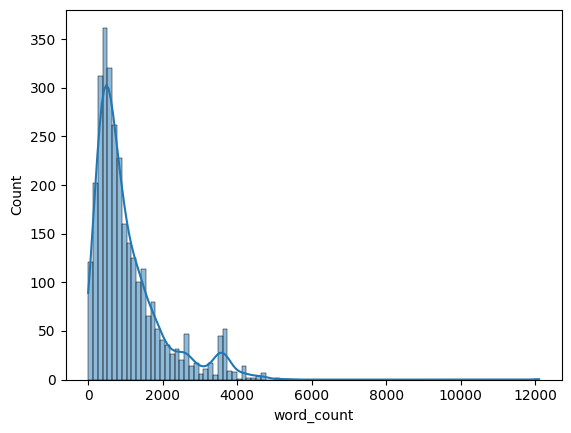

In [49]:
sns.histplot(df['word_count'],kde=True);